## Cattlelogue
*How should livestock habitat/grazing ground shift due to climate change, in a way that maximizes both economic gain and ecological conservation?*

Readout of CMIP6 monthly air temperature data from 2015-2100 under SSP4-6.0 scenario. This data is generated by the 
GISS-E2-1-G (USA) model and was downloaded from the Copernicus Climate Data Store (CDS). We first investigate this data
in order to gain a better understanding of CMIP experiment structure. [Reference](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019MS002025)

In [70]:
FILENAME = "ta_Amon_GISS-E2-1-G_ssp460_r1i1p1f2_gn_20150116-21001216.nc"
import netCDF4 as nc
import numpy as np

dataset = nc.Dataset(FILENAME, "r")

print("Variables:", dataset.variables.keys())
print("Dimensions:", dataset.dimensions.keys())

print("Time variable:", dataset.variables["time"])
print("Temperature variable:", dataset.variables["ta"])
print("Lat/lon bounds:", dataset.variables["lat_bnds"], dataset.variables["lon_bnds"])

# print("Temperature data dump:")
# print(dataset.variables['ta'][:])

Variables: dict_keys(['time_bnds', 'lat_bnds', 'lon_bnds', 'ta', 'time', 'plev', 'lat', 'lon'])
Dimensions: dict_keys(['time', 'bnds', 'lat', 'lon', 'plev'])
Time variable: <class 'netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    axis: T
    long_name: time
    standard_name: time
    units: days since 2015-01-01
    calendar: 365_day
unlimited dimensions: 
current shape = (1032,)
filling on, default _FillValue of 9.969209968386869e+36 used
Temperature variable: <class 'netCDF4.Variable'>
float32 ta(time, plev, lat, lon)
    _FillValue: 1e+20
    standard_name: air_temperature
    long_name: Air Temperature
    comment: Air Temperature
    units: K
    cell_methods: time: mean
    cell_measures: area: areacella
    history: 2020-04-23T14:47:58Z altered by CMOR: replaced missing value flag (-1e+30) with standard missing value (1e+20).
    missing_value: 1e+20
unlimited dimensions: 
current shape = (1032, 19, 90, 144)
filling on
Lat/lon bounds: <class 'netCDF4.Variable'>
f

(90, 144) (90, 144) (90, 144)


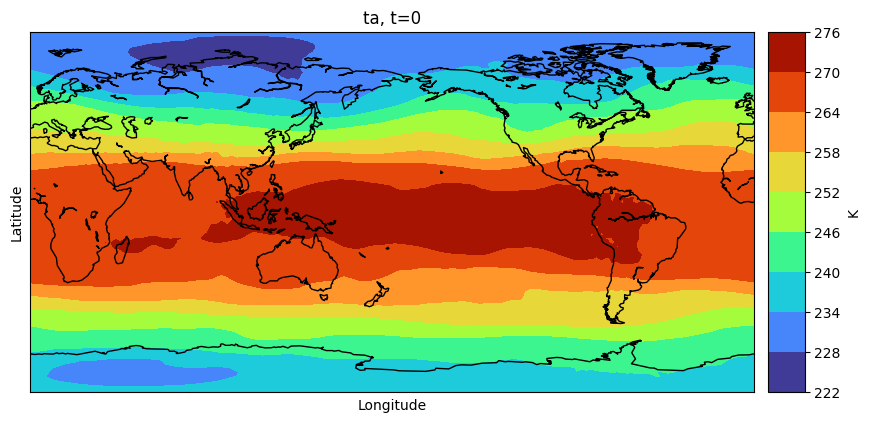

(90, 144) (90, 144) (90, 144)


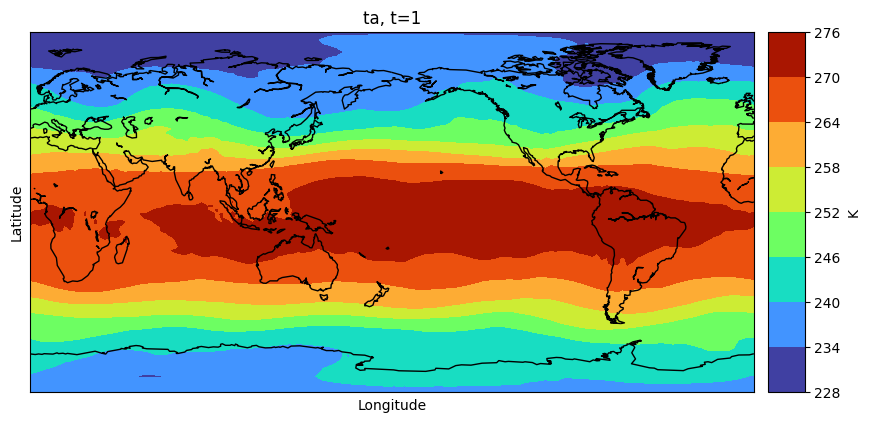

(90, 144) (90, 144) (90, 144)


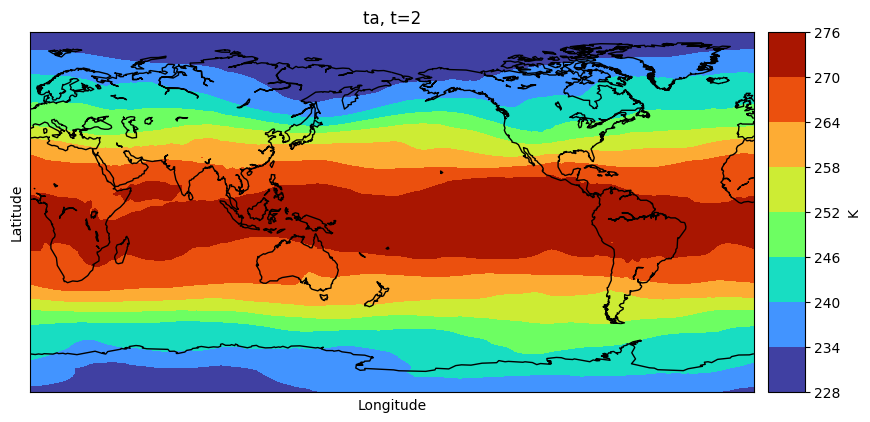

In [71]:
# Plot example map
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, maskoceans


def get_masked_data(dataset, var_name, t, pressure=5):
    data_var_full = dataset.variables[var_name][:]
    if data_var_full.ndim == 4:
        data = data_var_full[t][pressure]
    else:
        data = data_var_full[t]
    lat = dataset.variables["lat"][:]
    lon = dataset.variables["lon"][:]
    lat_2d = np.repeat(lat[np.newaxis, :], data.shape[1], axis=0).T
    lon_2d = np.repeat(lon[np.newaxis, :], data.shape[0], axis=0)
    print(lat_2d.shape, lon_2d.shape, data.shape)
    # data_masked = maskoceans(lon_2d, lat_2d, data, inlands=True)
    return data


def plot_contourmap(dataset, var_name, t):
    lat = dataset.variables["lat"][:]
    lon = dataset.variables["lon"][:]
    # data = dataset.variables[var_name][:] * 1
    data = get_masked_data(dataset, var_name, t, 5)

    plt.figure(figsize=(10, 5))
    m = Basemap(
        projection="cyl",
        llcrnrlat=lat.min(),
        urcrnrlat=lat.max(),
        llcrnrlon=lon.min(),
        urcrnrlon=lon.max(),
        resolution="c",
    )
    m.drawcoastlines()

    ny, nx = data.shape[0], data.shape[1]
    lons, lats = m.makegrid(nx, ny)
    x, y = m(lons, lats)
    m.contourf(x, y, data, cmap="turbo")
    m.colorbar(label=dataset.variables[var_name].units)

    plt.title(f"{var_name}, t={t}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


for i in range(3):
    plot_contourmap(dataset, "ta", i)

Attack Plan:
1. Compute temperature feature vectors using Fourier transform on annual temperature data (actual and predicted).
2. Train random forest on vectors from actual data + hi-res map of landscape topography to predict livestock yield (or grassland percentage?)
3. Use trained model to predict livestock yield on future temperature data, and compare with actual yield data.

Need to find:
- Elevation data
- Livestock yield data
- Grassland percentage data
- Actual temperature data for 2015-2020 to compare with CMIP6 data
- Actual temperature data from historical records to train model
- Ecological conservation data (e.g., biodiversity indices, soil health metrics)

(90, 144) (90, 144) (90, 144)


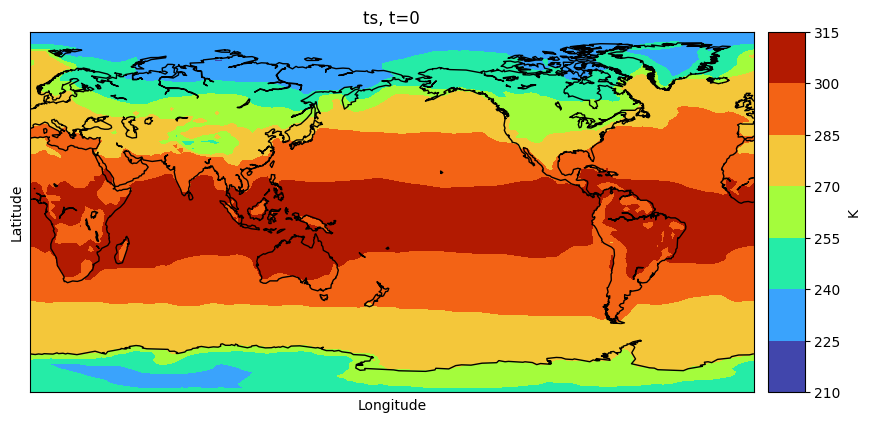

(90, 144) (90, 144) (90, 144)


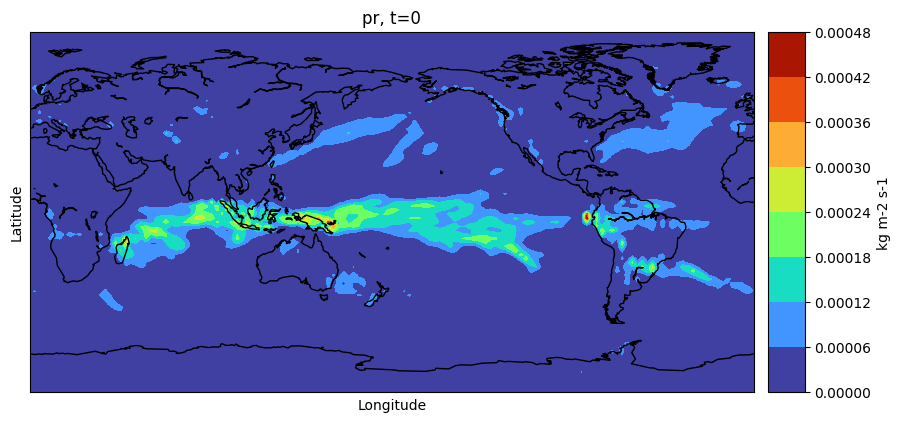

In [72]:
SURFACE_TEMP_FILENAME = "ts_Amon_GISS-E2-1-G_ssp460_r1i1p1f2_gn_20150116-21001216.nc"
PRECIP_FILENAME = "pr_Amon_GISS-E2-1-G_ssp460_r1i1p1f2_gn_20150116-21001216.nc"

surf_temp_dataset = nc.Dataset(SURFACE_TEMP_FILENAME, "r")
precip_dataset = nc.Dataset(PRECIP_FILENAME, "r")

plot_contourmap(surf_temp_dataset, "ts", 0)
plot_contourmap(precip_dataset, "pr", 0)

In [46]:
# Generate distance maps from map of transportation networks

## Livestock maps
This is from the United Nations Food and Agriculture Organization (FAO) Gridded Livestock of the World 4 survey. It provides a global map of livestock distribution, which can be used to analyze the impact of climate change on livestock habitats.

<tifffile.TiffPage 0 @200> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')
<tifffile.TiffPage 1 @3220> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')
<tifffile.TiffPage 2 @4280> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')
<tifffile.TiffPage 3 @4860> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')
<tifffile.TiffPage 4 @5296> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')
<tifffile.TiffPage 5 @5668> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')
<tifffile.TiffPage 0 @200> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')


Tiff file info: TiffFile 'GLW4-2020.D-DA.CTL.tif'  12.08 MiB  BigTiff  6 Pages  geotiff
Tiff tags: [256, 257, 258, 259, 262, 277, 284, 317, 322, 323, 324, 325, 339, 33550, 33922, 34735, 34736, 34737, 42113]
Tiff shape: (2160, 4320)
Tiff dtype: float32
(2160, 4320)


C:\Users\jc\AppData\Local\Temp\ipykernel_16460\2960792269.py:20: RuntimeWarning: divide by zero encountered in log1p
  livestock_data = np.log1p(livestock_data)
<tifffile.TiffPage 0 @200> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')
<tifffile.TiffPage 1 @3220> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')


(1080, 2160)


<tifffile.TiffPage 0 @200> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')
<tifffile.TiffPage 2 @4280> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')


(540, 1080)


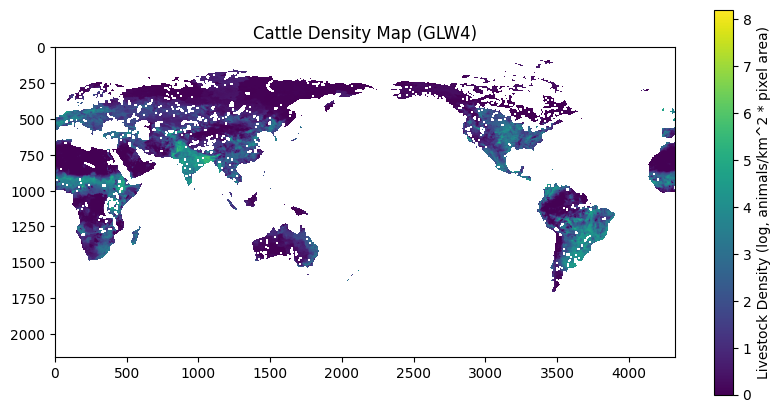

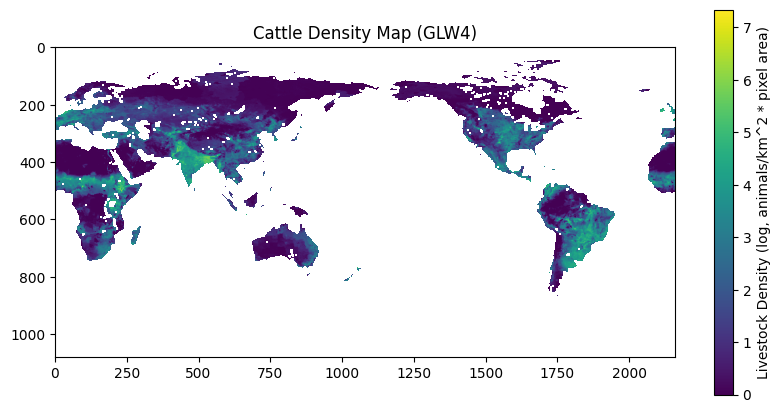

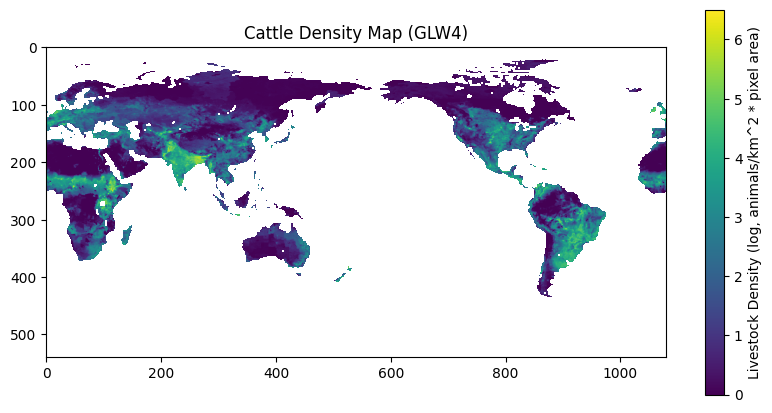

In [75]:
import tifffile as tiff

LIVESTOCK_FILENAME = "GLW4-2020.D-DA.CTL.tif"

with tiff.TiffFile(LIVESTOCK_FILENAME) as tif:
    print("Tiff file info:", tif)
    print("Tiff tags:", tif.pages[0].tags.keys())
    print("Tiff shape:", tif.pages[0].shape)
    print("Tiff dtype:", tif.pages[0].dtype)

for i in range(3):  # 6
    # These appear to be different resolutions of livestock density data
    livestock_data = tiff.imread(LIVESTOCK_FILENAME, key=i)

    # mask out -3e38 (oceans/no data)
    livestock_data[livestock_data < 0] = -1
    print(livestock_data.shape)

    # log scale
    livestock_data = np.log1p(livestock_data)

    # FAO plots the prime meridian at the center whereas CMIP data places it at the left edge
    livestock_data = np.roll(livestock_data, livestock_data.shape[1] // 2, axis=1)

    plt.figure(figsize=(10, 5))
    plt.title(f"Cattle Density Map (GLW4)")
    plt.imshow(livestock_data, cmap="viridis")
    plt.colorbar(label="Livestock Density (log, animals/km^2 * pixel area)")

## Dataset Generation
We aggregate the data from the CMIP6 dataset and the FAO Gridded Livestock of the World 4 survey to create a comprehensive dataset for training our model. For each grid cell in GLW4, we take its closest CMIP6 grid cell and extract temperature/precipitation data for the year 2020. We then compute the Fourier transform of the temperature data and precipitation data to create a feature vector for each grid cell. This feature vector is then used to train a random forest model to predict livestock density.

In [93]:
import cv2

x_data = []
y_data = []


# feature vector helpers
def fourier(timeseries):
    n = len(timeseries)
    freq = np.fft.fftfreq(n)
    fourier_transform = np.fft.fft(timeseries)
    return np.abs(fourier_transform), freq


def generate_feature_vector(temp_data, precip_data):
    fourier_temp, freq = fourier(temp_data)
    feature_vector = np.concatenate((fourier_temp, precip_data))
    return feature_vector


# upscale CMIP data to GLW4 resolution
def upscale_to_glw4(glw4_shape, cmip_data):
    # Assuming cmip_data is a 3D array and glw4_shape is the target shape
    cmip_data_resized = cv2.resize(
        cmip_data, (glw4_shape[1], glw4_shape[0]), interpolation=cv2.INTER_LINEAR
    )
    return cmip_data_resized


# First year of data. The cv2.merge hack arranges the data into the correct shape, with months
# as "input channels" in an image.
surf_temp_data = cv2.merge(surf_temp_dataset.variables["ts"][:][:12])
surf_temp_fourier, _ = fourier(surf_temp_data)
precip_data = cv2.merge(precip_dataset.variables["pr"][:][:12])
precip_fourier, _ = fourier(precip_data)

glw4_shape = livestock_data.shape
surf_temp_fourier_resized = upscale_to_glw4(glw4_shape, surf_temp_fourier)
precip_fourier_resized = upscale_to_glw4(glw4_shape, precip_fourier)

feature_vectors = cv2.merge(
    (surf_temp_fourier_resized, precip_fourier_resized)
).reshape(-1, surf_temp_fourier_resized.shape[2] + precip_fourier_resized.shape[2])
labels = livestock_data.reshape(-1, 1)

# Filter out invalid data points
valid_indices = np.where(labels >= 0)[0]
feature_vectors = feature_vectors[valid_indices]
labels = labels[valid_indices]

# Sanity check
print("Feature vectors shape:", feature_vectors.shape)
print("Labels shape:", labels.shape)
print("Feature vector example:", feature_vectors[0])
print("Label example:", labels[0])

Feature vectors shape: (139523, 24)
Labels shape: (139523, 1)
Feature vector example: [2.95384159e+03 6.80899599e+01 3.03741634e+01 1.14547580e+01
 7.54187263e+00 4.11091908e+00 2.94796716e+00 4.11091908e+00
 7.54187263e+00 1.14547580e+01 3.03741634e+01 6.80899599e+01
 6.94398521e-05 8.36691789e-06 7.29521373e-06 1.04599729e-05
 6.84550818e-06 9.81645479e-06 2.10762694e-06 9.81645479e-06
 6.84550818e-06 1.04599729e-05 7.29521373e-06 8.36691789e-06]
Label example: [0.]


## ML Regression Model
We try two approaches: a random forest model (AdaBoost), and a simple MLP model (regression with MSE loss function).

In [91]:
# AdaBoost Regression Model

from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    feature_vectors, labels, test_size=0.8, random_state=42
)
model = AdaBoostRegressor(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42, verbose=1),
    n_estimators=50,
    random_state=42,
)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   49.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   47.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   47.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   45.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   46.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   45.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   45.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   42.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

Mean Squared Error: 0.2954123056463513


In [92]:
from joblib import dump, load
dump(model, "livestock_model.joblib")

['livestock_model.joblib']

In [ ]:
# MLP Training

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm


class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.SiLU(),
            nn.Linear(128, 128),
            nn.SiLU(),
            nn.Linear(128, 64),
            nn.SiLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        x = self.network(x)
        return x


loader = DataLoader(
    list(zip(feature_vectors, labels)),
    batch_size=1024,
    shuffle=True,
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mlp_model = MLPModel(feature_vectors.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

for epoch in range(30):
    mlp_model.train()
    for batch_features, batch_labels in tqdm(loader):
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()
        outputs = mlp_model(batch_features.float())
        loss = criterion(outputs, batch_labels.float())
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 1, Loss: 3.475200653076172


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 2, Loss: 1.5191494226455688


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 3, Loss: 1.6275893449783325


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 4, Loss: 1.53316068649292


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 5, Loss: 1.664539098739624


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 6, Loss: 1.6685177087783813


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 7, Loss: 1.4483002424240112


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 8, Loss: 1.4373283386230469


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 9, Loss: 1.69329833984375


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 10, Loss: 1.6541104316711426


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 11, Loss: 1.6139839887619019


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 12, Loss: 1.6613929271697998


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 13, Loss: 1.473908543586731


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 14, Loss: 1.591418743133545


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 15, Loss: 1.4973188638687134


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 16, Loss: 1.5089836120605469


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 17, Loss: 1.543899655342102


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 18, Loss: 1.678600788116455


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 19, Loss: 1.7268704175949097


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 20, Loss: 1.5125648975372314


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 21, Loss: 1.4746392965316772


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 22, Loss: 1.6125156879425049


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 23, Loss: 1.6869758367538452


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 24, Loss: 1.621651530265808


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 25, Loss: 1.5343661308288574


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 26, Loss: 1.6542736291885376


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 27, Loss: 1.5553226470947266


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 28, Loss: 1.5764750242233276


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 29, Loss: 1.5687910318374634


  0%|          | 0/127 [00:00<?, ?it/s]

Epoch 30, Loss: 1.6209490299224854


In [ ]:
# MLP Evaluation
mlp_model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
    y_pred_tensor = mlp_model(X_test_tensor)
    mse = criterion(y_pred_tensor, y_test_tensor.unsqueeze(1))
    print("MLP Mean Squared Error:", mse.item())

c:\Users\jc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([25928, 1, 1])) that is different to the input size (torch.Size([25928, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MLP Mean Squared Error: 1.9059700965881348


In [77]:
# Create projections for 2100

from joblib import load
import cv2
import numpy as np

model = load("livestock_model.joblib")

year = 2100

def year_to_index(year):
    return (year - 2015) * 12


st, end = year_to_index(year), year_to_index(year + 1)
surf_temp_data = cv2.merge(surf_temp_dataset.variables["ts"][:][st:end])
surf_temp_fourier, _ = fourier(surf_temp_data)
precip_data = cv2.merge(precip_dataset.variables["pr"][:][st:end])
precip_fourier, _ = fourier(precip_data)

glw4_shape = livestock_data.shape
surf_temp_fourier_resized = upscale_to_glw4(glw4_shape, surf_temp_fourier)
precip_fourier_resized = upscale_to_glw4(glw4_shape, precip_fourier)

feature_vectors = cv2.merge(
    (surf_temp_fourier_resized, precip_fourier_resized)
).reshape(-1, surf_temp_fourier_resized.shape[2] + precip_fourier_resized.shape[2])

'''
with torch.no_grad():
    feature_vectors_tensor = torch.tensor(feature_vectors, dtype=torch.float32).to(
        device
    )
    predictions_tensor = mlp_model(feature_vectors_tensor)
    predictions = predictions_tensor.cpu().numpy()
'''
predictions = model.predict(feature_vectors)
    
predictions_masked = np.zeros(livestock_data.shape[0] * livestock_data.shape[1])
predictions_masked[:] = -1
predictions_masked[valid_indices] = predictions[valid_indices].flatten()
predictions_reshaped = predictions_masked.reshape(glw4_shape)
# invert latitude axis if necessary
# predictions_reshaped = np.flipud(predictions_reshaped)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Do

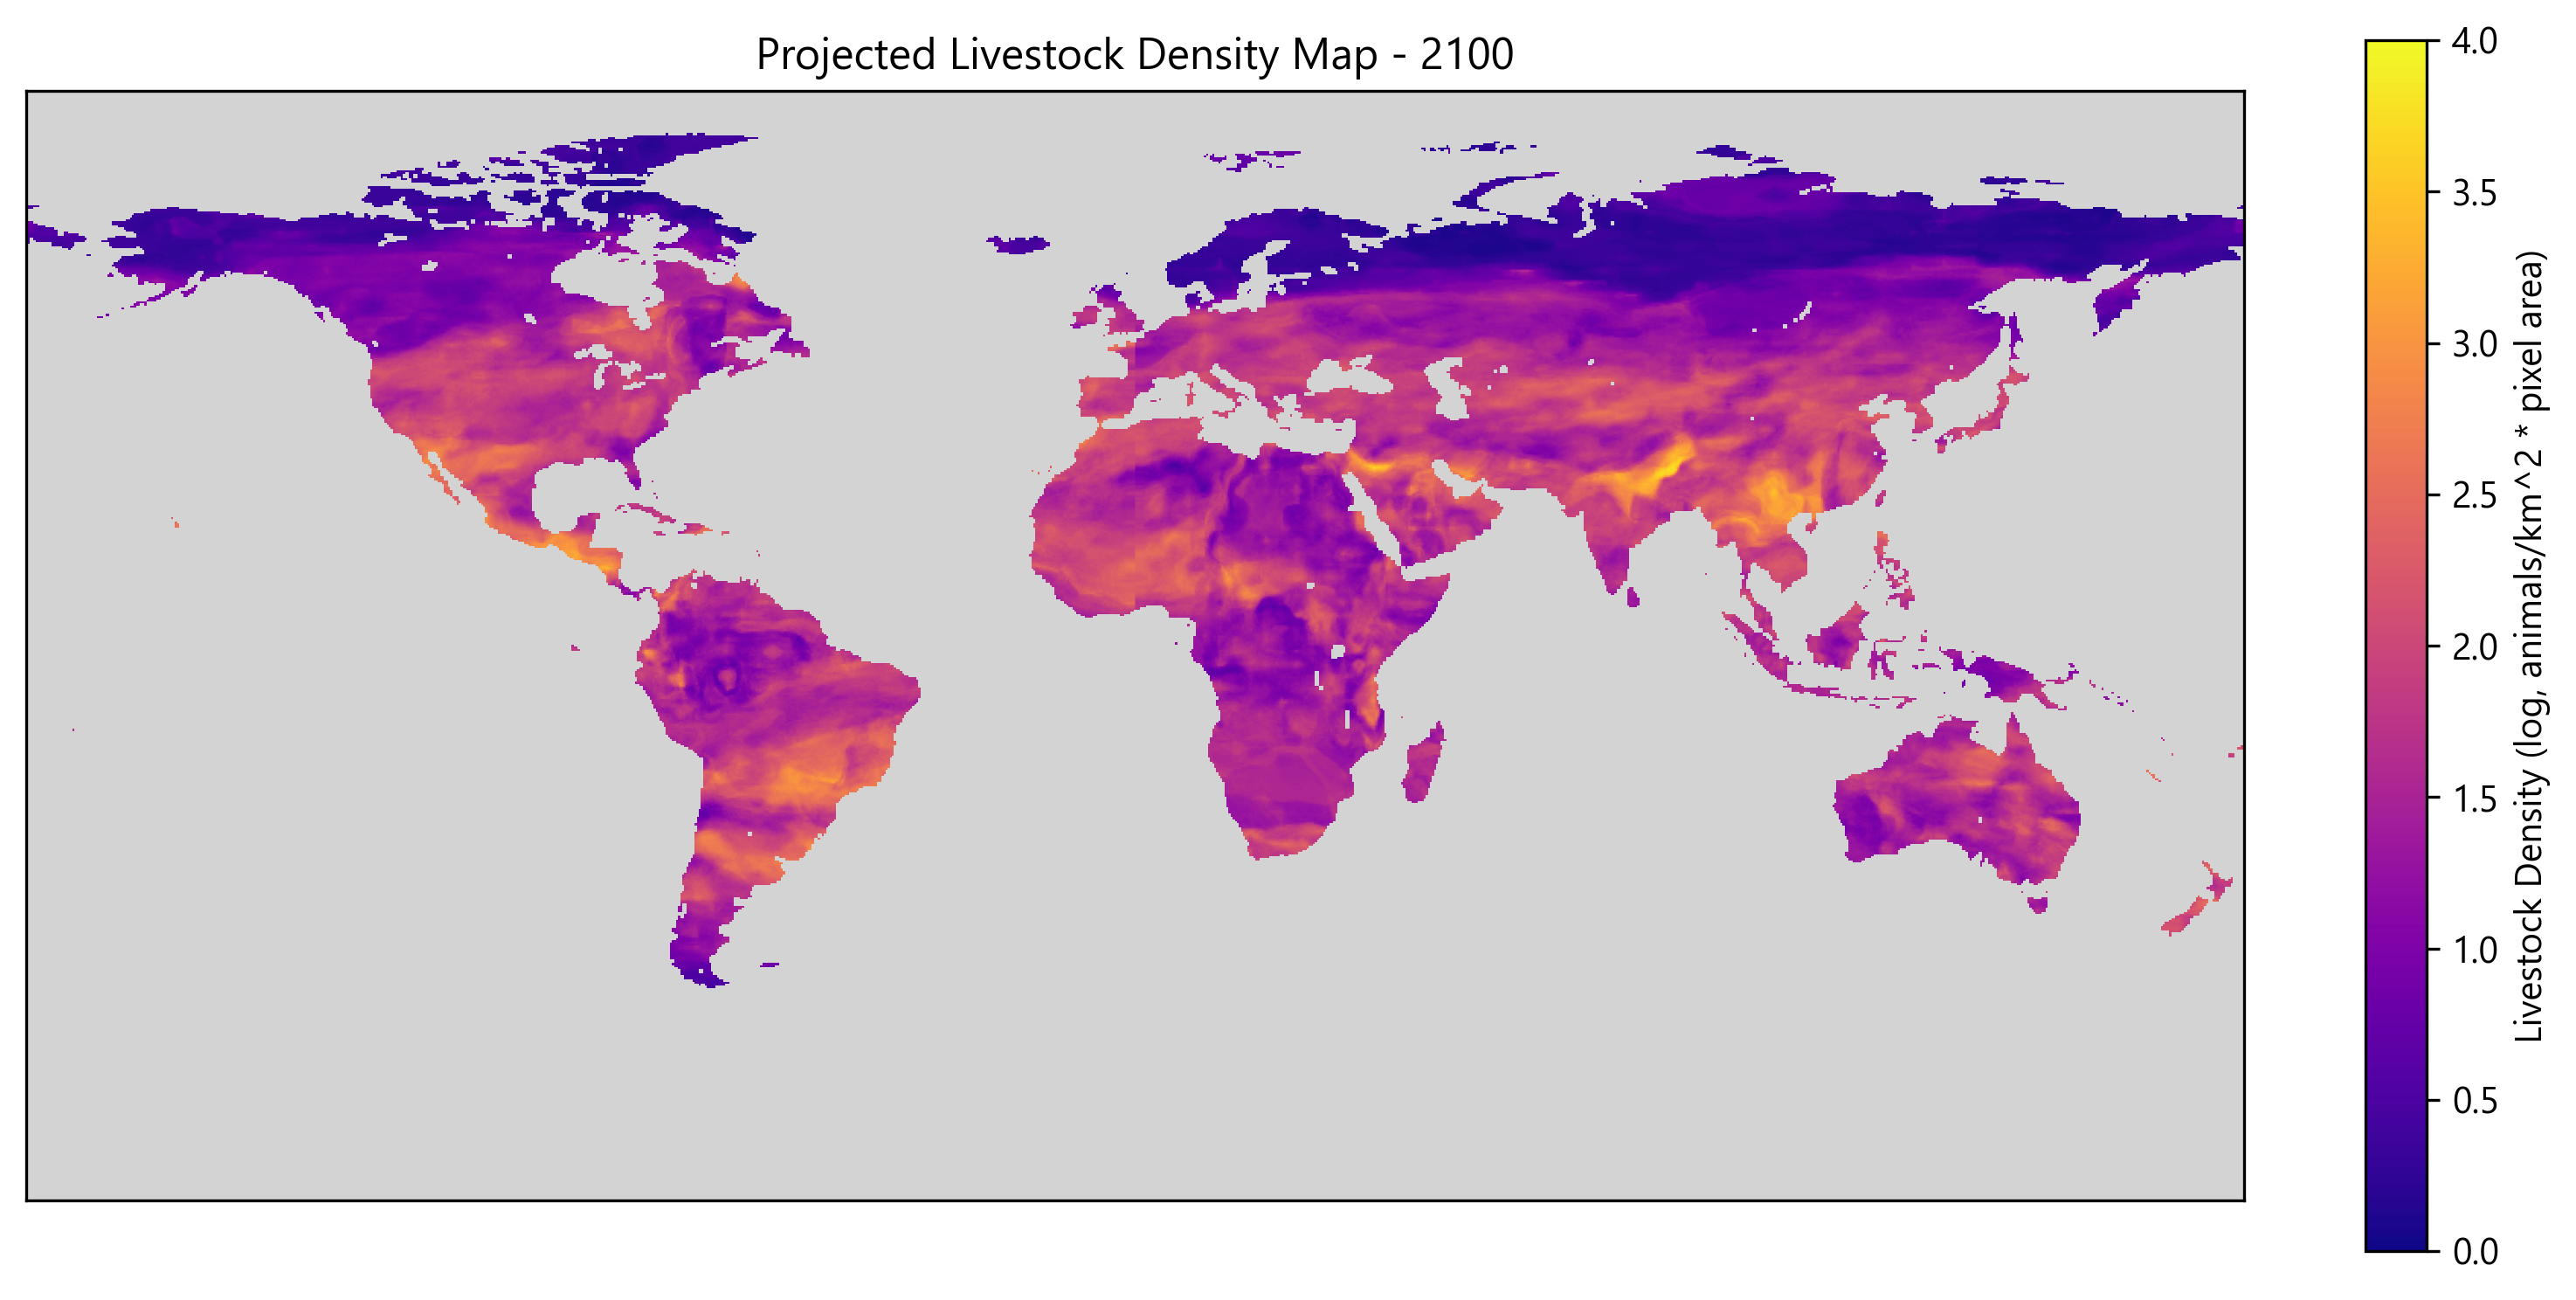

In [155]:
predictions_masked = np.zeros(livestock_data.shape[0] * livestock_data.shape[1])
predictions_masked[:] = -1
predictions_masked[valid_indices] = predictions[valid_indices].flatten()
predictions_reshaped = predictions_masked.reshape(glw4_shape)
predictions_reshaped = np.ma.masked_where(predictions_reshaped == -1, predictions_reshaped)

predictions_reshaped = np.roll(predictions_reshaped, predictions_reshaped.shape[1] // 2, axis=1)

plt.rcParams.update({"font.family": "Segoe UI", "font.size": 10})
plt.figure(figsize=(12, 6), dpi=300)
plt.title(f"Projected Livestock Density Map - 2100", fontsize=12)
plt.gca().set_facecolor("lightgray")
plt.imshow(
    predictions_reshaped,
    cmap="plasma",
    vmin=0,
    vmax=4
)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.colorbar(label="Livestock Density (log, animals/km^2 * pixel area)", fraction=0.04)
plt.show()

Next Steps (6/30):
1. Collect more data sources (e.g., elevation, grassland percentage, transportation network proximity)
2. Try regression with intermediate outputs (e.g. corn yields)
3. Investigate normalization of feature vectors
4. Optimize AdaBoost model for faster runtime
5. Try neighbor-aware DL methods (U-Net CNN)
6. Ecological conservation impact (find map of current human land use?)


In [1]:
import ee
ee.Authenticate()


Successfully saved authorization token.


In [4]:
ee.Initialize()

In [55]:
import numpy as np
SCALE_FACTOR = 10

HUMAN_MODIF_ID = "CSP/HM/GlobalHumanModification"
human_modification = ee.ImageCollection(HUMAN_MODIF_ID).select("gHM")
human_modif_npy = ee.data.computePixels({
    "expression": human_modification.first(),
    "fileFormat": "NUMPY_NDARRAY",
    "grid": {
        'dimensions': {
            'width': 360 * SCALE_FACTOR,
            'height': 180 * SCALE_FACTOR
        },
        'affineTransform': {
            'scaleX': 1 / SCALE_FACTOR,
            'shearX': 0,
            'translateX': -180,
            'shearY': 0,
            'scaleY': -1 / SCALE_FACTOR,
            'translateY': 90
        },
        'crsCode': 'EPSG:4326',
    },
})

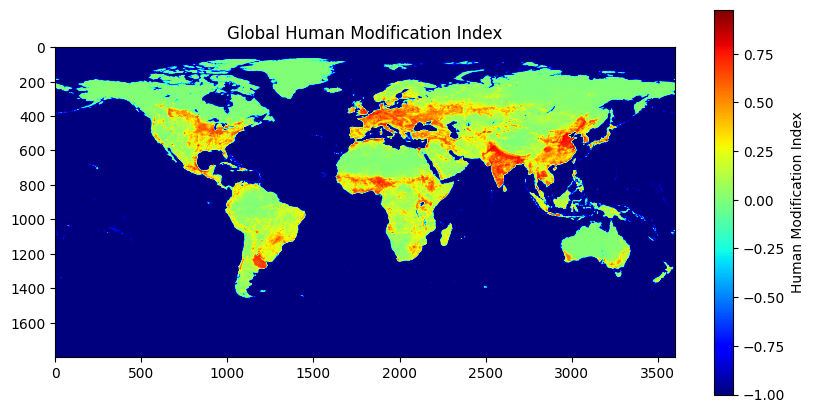

In [63]:
fig = plt.figure(figsize=(10, 5))
plt.title("Global Human Modification Index")
human_modif_npy_band = human_modif_npy["gHM"]
human_modif_npy_band[human_modif_npy_band < 0] = -1  # Mask out invalid data
plt.imshow(human_modif_npy_band, cmap="jet")
plt.colorbar(label="Human Modification Index")
plt.show()